<a href="https://colab.research.google.com/github/GermainKausa/cloudflare-docs/blob/production/tensoflow_ia_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data="/content/drive/MyDrive/dataset/BreastCancerPrediction.csv"

In [ ]:
import pandas as pd
mesDonnees=pd.read_csv(data)

In [ ]:
mesDonnees

,Sample code number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
#from ann_visualizer.visualize import ann_viz
from keras.utils import plot_model

In [ ]:
x=mesDonnees.drop(["Sample code number","Class"],axis=1)
y=mesDonnees["Class"]

In [ ]:
y=y.replace([2,4],[0,1])
y

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=tf.keras.models.Sequential()
##tf tensorflow,,,construction de couche du resaeu de neurone
model.add(tf.keras.layers.Dense(units=15,activation="relu", kernel_initializer='uniform',input_dim=9))
model.add(tf.keras.layers.Dense(units=12,activation="relu", kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=12,activation="relu", kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=8,activation="sigmoid", kernel_initializer='uniform'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                150       
                                                                 
 dense_1 (Dense)             (None, 12)                192       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
Total params: 602 (2.35 KB)
Trainable params: 602 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Etape 2
df=pd.DataFrame(x_test)
x_test_simple=df.values.tolist()
predictions=(model.predict(x_test_simple)>0.1).astype("int32")
print("\n Résultat du test est :")
for i in range(len(x_test_simple)):
  print("x=%s, Predit=%s"%(x_test_simple[i],predictions[i]))

5/5 [==============================] - 0s 4ms/step

 Résultat du test est :
x=[8, 3, 4, 9, 3, 10, 3, 3, 1], Predit=[1 1 1 1 1 1 1 1]
x=[8, 8, 7, 4, 10, 10, 7, 8, 7], Predit=[1 1 1 1 1 1 1 1]
x=[1, 1, 1, 1, 2, 1, 3, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[1, 1, 2, 2, 2, 1, 3, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[1, 1, 1, 1, 1, 1, 2, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[5, 1, 1, 1, 3, 2, 2, 2, 1], Predit=[1 1 1 1 1 1 1 1]
x=[1, 1, 3, 1, 1, 1, 2, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[1, 1, 1, 2, 1, 3, 1, 1, 7], Predit=[1 1 1 1 1 1 1 1]
x=[4, 2, 3, 5, 3, 8, 7, 6, 1], Predit=[1 1 1 1 1 1 1 1]
x=[4, 1, 2, 1, 2, 1, 2, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[1, 1, 1, 1, 2, 1, 1, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[4, 1, 1, 1, 1, 1, 2, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[6, 1, 3, 1, 2, 1, 3, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[6, 1, 1, 1, 2, 1, 3, 1, 1], Predit=[1 1 1 1 1 1 1 1]
x=[7, 2, 4, 1, 3, 4, 3, 3, 1], Predit=[1 1 1 1 1 1 1 1]
x=[10, 5, 7, 4, 4, 10, 8, 9, 1], Predit=[1 1 1 1 1 1 1 1]
x=[4, 1, 1, 1, 2, 1, 3,

In [ ]:
#Etape3 compilation d'abord
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Etape3 après compilation
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print(f'Error de Test :{test_loss}')
print(f'Accuracy de Test :{test_accuracy}')

5/5 [==============================] - 0s 4ms/step - loss: 2.0795 - accuracy: 0.0000e+00
Error de Test :2.0795161724090576
Accuracy de Test :0.0


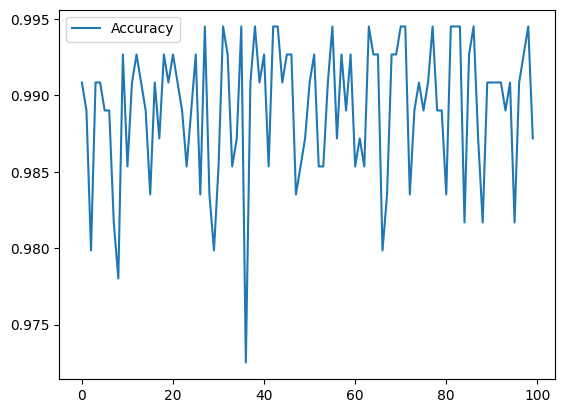

Resultat de training
Epoch 1/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 0.9853
Epoch 2/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.9908
Epoch 3/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0334 - accuracy: 0.9890
Epoch 4/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0163 - accuracy: 0.9927
Epoch 5/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9945
Epoch 6/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.9945
Epoch 7/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.9945
Epoch 8/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9817
Epoch 9/100
546/546 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9799
Epoch 10/100
546/546 [==============================] - 1s 2ms/step - 

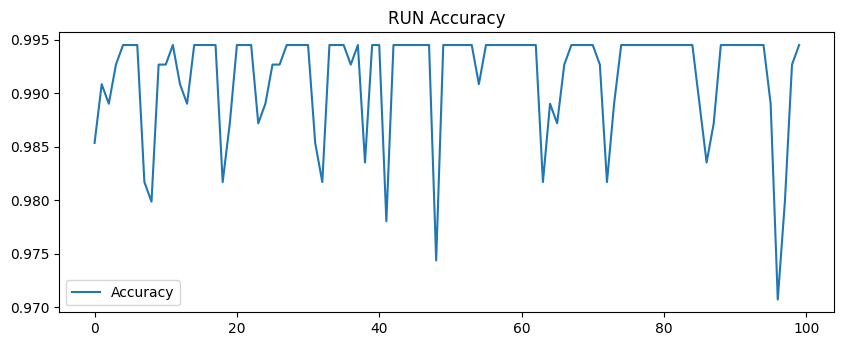

In [ ]:
#epoch frowordabck et backsize les deux forment epoch
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.plot(train.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()
print('Resultat de training')
train=model.fit(x_train,y_train, epochs=100, batch_size=1)
pyplot.figure(figsize=(10,8))
pyplot.subplot(211)
pyplot.title("RUN Accuracy")
pyplot.plot(train.history['accuracy'],label='Accuracy')
pyplot.legend()
pyplot.show()

In [ ]:
#Creation d'une method pour use notre modele
import numpy as np
def cancer(Clump_Thickness=5, Uniformity_of_Cell_Size=8, Uniformity_of_Cell_Shape=4, Marginal_Adhesion=10, Single_Epithelial_Cell_Size=10, Barca_Nuclei=10, Bland_Chromatin=10, Normal_Nucleoli=1, Mitoses=1):
    x=np.array([Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Barca_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses]).reshape(1,9)
    # Le corps de la fonction va ici
    print((model.predict(x)>0.5).astype("int32"))